In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [2]:
ad_details = pd.read_csv('ad_details.csv')
ad_events = pd.read_csv('ad_events.csv')
customers = pd.read_csv('customer_profiles.csv')

In [29]:
random.seed(0)

def randomIndex(count, df):
    randList = []
    while len(randList) <= count:
        num = random.randint(0,len(df))
        if not num in randList:
            randList.append(num)
    return randList
        
testIDX = randomIndex(1000, customers)
testCustomers = customers.iloc[testIDX].reset_index(drop=True)

In [30]:
testCustomers.head()

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,M,38,261e8e8518ef4383b1b1f3243a29c337,20171214,61000.0,Yes,0,Florida
1,M,32,cabc2b86a6d44f6b931f2bf546f593ab,20170806,30000.0,No,0,Washington
2,F,45,52f3ac705f5e44f0a95a4ac13c04f97a,20171112,65000.0,Yes,0,Pennsylvania
3,M,53,b35f597f7d75438b8b4212647780727a,20180427,71000.0,No,2,Iowa
4,M,21,1acf2c2567854a3f83bc6f80abd2795a,20160209,31000.0,Yes,2,Nebraska


<AxesSubplot:xlabel='age', ylabel='income'>

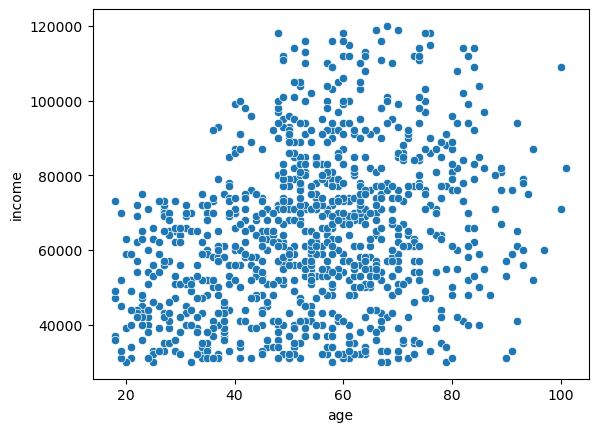

In [31]:
sns.scatterplot(data=testCustomers, x='age', y='income')

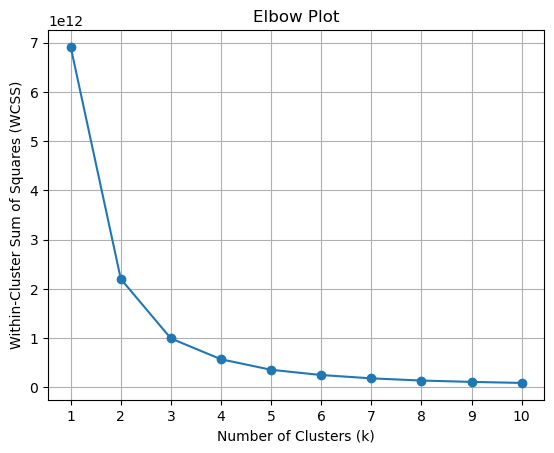

In [41]:
data = customers[['age', 'income']].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

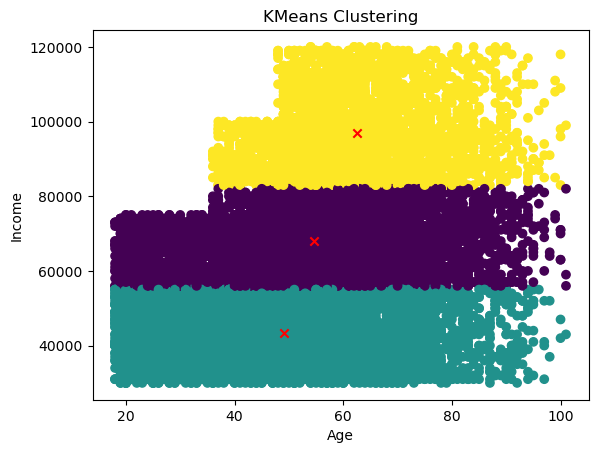

In [43]:
data = customers[['age', 'income']].values

# Instantiate KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(data)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster assignments for each data point
labels = kmeans.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMeans Clustering')
plt.show()

In [50]:
ad_details.head(10)

,reward,channels,required_amount,duration (days),offer_type,ad id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [45]:
ad_events['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)